## Import Required Packages

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

## Load the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train = y_train == 2
y_test = y_test == 2

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

## Model Building

In [5]:
model = Sequential(
    [
        Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3), activation="relu"),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding="same", activation="relu"),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

In [6]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

In [7]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=25,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/25
1563/1563 [==============================] - 22s 7ms/step - loss: 0.3317 - accuracy: 0.8915 - val_loss: 0.4348 - val_accuracy: 0.8103
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2601 - accuracy: 0.9041 - val_loss: 0.2609 - val_accuracy: 0.9043
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2340 - accuracy: 0.9124 - val_loss: 0.2842 - val_accuracy: 0.9054
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2204 - accuracy: 0.9182 - val_loss: 0.2076 - val_accuracy: 0.9213
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2052 - accuracy: 0.9232 - val_loss: 0.2186 - val_accuracy: 0.9198
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1920 - accuracy: 0.9275 - val_loss: 0.1990 - val_accuracy: 0.9241
Epoch 7/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1819 - accuracy: 0.9314 - val_loss: 0.2043 - val_acc

## Model Evaluation

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2066 - accuracy: 0.9421
Test Loss: 0.2065865695476532, Test Accuracy: 0.9420999884605408


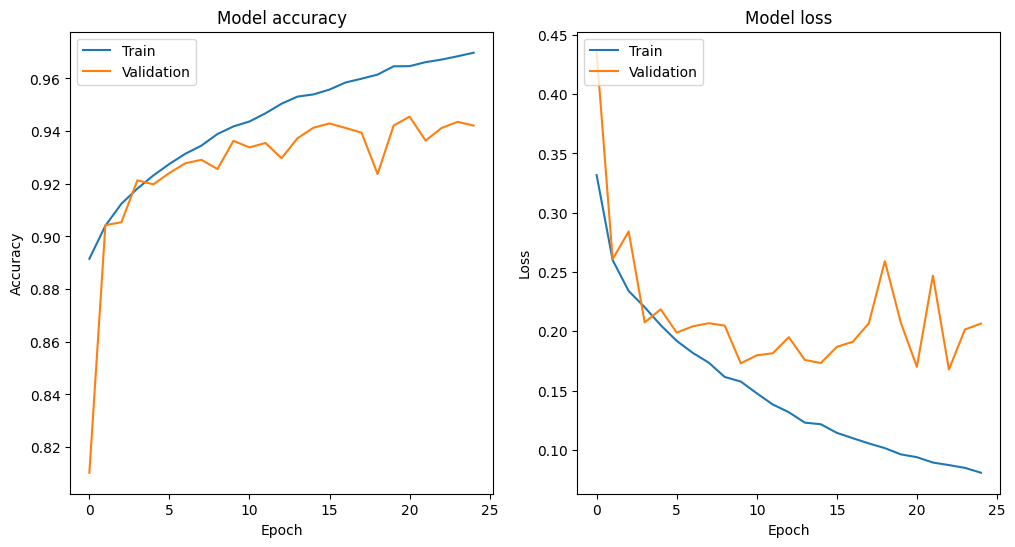

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

## Model Saving

In [10]:
model.save("./model/bird_model.keras")